In [1]:
%matplotlib inline

from pylab import *
import matplotlib.pyplot as plt


Initialisation
==============

* importing pyAgrum
* importing pyAgrum.lib tools
* loading a BN

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from pyAgrum.lib.pretty_print import pretty_cpt

## Create a first BN : bn

In [3]:
bn=gum.loadBN("../resources/asia.bif")
# randomly re-generate parameters for every Conditional Probability Table
bn.generateCPTs() 
gnb.showBN(bn,size="3")

## Create a second BN : bn2

In [4]:
bn2=gum.loadBN("../resources/asia.bif")
bn2.generateCPTs()
gnb.showBN(bn,size="3")

## bn vs bn2 : different parameters

In [14]:
from IPython.display import HTML
HTML('<table><tr><td>a CPT in bn</td><td>same CPT in bn2</td></tr><tr><td><pre>'+pretty_cpt(bn.cpt(3))+'</pre></td><td><pre>'+pretty_cpt(bn2.cpt(3))+'</pre></td></tr></table>')

a CPT in bn,same CPT in bn2
|---------------| -----------------------|positive_XraY? | tuberculos_or_cancer? | 0 1 | -----------------------|---------------| 0 | 0.5131 0.4869 | 1 | 0.5857 0.4143 | -----------------------|---------------|,|---------------| -----------------------|positive_XraY? | tuberculos_or_cancer? | 0 1 | -----------------------|---------------| 0 | 0.9562 0.0438 | 1 | 0.0383 0.9617 | -----------------------|---------------|


## Exact and (Gibbs) approximated KL-divergence 

In order to compute KL-divergence, we just need to be sure that the 2 distributions are defined on the same domain (same variables, etc.)

<h3>Exact KL</h3>


In [15]:
g1=gum.BruteForceKL(bn,bn2)
print(g1.compute())

{'errorPQ': 0, 'hellinger': 0.9754999658153894, 'errorQP': 0, 'klPQ': 4.5672238365904, 'klQP': 2.980615229451395, 'bhattacharya': 0.6458821629362527}


If the models are not on the same domain :

In [16]:
bn_different_domain=gum.loadBN("../resources/alarm.dsl")

# g=gum.BruteForceKL(bn,bn_different_domain) # a KL-divergence between asia and alarm ... :(
#
# would cause
#---------------------------------------------------------------------------
#OperationNotAllowed                       Traceback (most recent call last)
#
#OperationNotAllowed: this operation is not allowed : KL : the 2 BNs are not compatible (not the same vars : visit_to_Asia?)

<h3>Gibbs-approximated KL</h3>

There is something wrong with <em>Bhattacharya</em> computations...


In [17]:
g=gum.GibbsKL(bn,bn2)
g.setVerbosity(True)
g.setMaxTime(120)
g.setBurnIn(5000)
g.setEpsilon(1e-7)
g.setPeriodSize(500)

In [18]:
print(g.compute())
print("Computed in {0} s".format(g.currentTime()))

{'errorPQ': 0, 'hellinger': 0.9779275953419747, 'errorQP': 0, 'klPQ': 4.565492148978481, 'klQP': 3.0151167298784696, 'bhattacharya': -11.476355836755392}
Computed in 11.378637 s


--
stopped with epsilon=1e-07
--
Temps de calcul : 11.378637
Nombre d'itérations : 183500


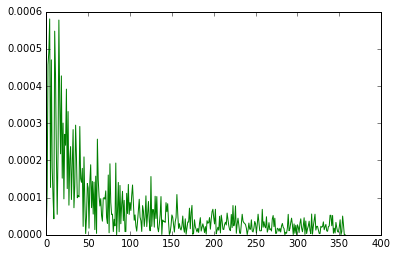

In [20]:
print("--")

print(g.messageApproximationScheme())
print("--")

print("Temps de calcul : {0}".format(g.currentTime()))
print("Nombre d'itérations : {0}".format(g.nbrIterations()))

p=plot(g.history(), 'g')

### Animation of Gibbs KL

Since it may be difficult to know what happens during approximation algorithm, pyAgrum allow to follow the iteration using animated matplotlib figure

In [21]:
g=gum.GibbsKL(bn,bn2)
g.setMaxTime(60)
g.setBurnIn(500)
g.setEpsilon(1e-7)
g.setPeriodSize(5000)

{'bhattacharya': -12.753348898413805,
 'errorPQ': 0,
 'errorQP': 0,
 'hellinger': 0.9726802632103955,
 'klPQ': 4.565481124331753,
 'klQP': 2.9434580476846133}

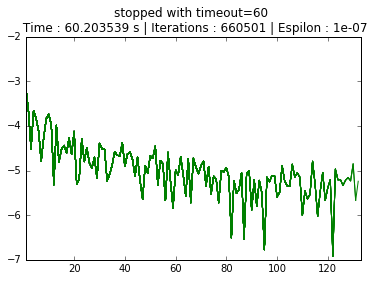

In [22]:
gnb.animApproximationScheme(g) # logarithmique scale for Y
g.compute()